9.1.2

In [2]:
import statsmodels.api as sm
import pandas as pd

housing_prices = pd.read_csv("../datasets/housing_prices.csv")

X = housing_prices[["sq_footage", "n_bedrooms"]]
y = housing_prices["price"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3285.
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        11:36:58   Log-Likelihood:                -15993.
No. Observations:                1298   AIC:                         3.199e+04
Df Residuals:                    1295   BIC:                         3.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.044e+05   4966.113     21.030      0.0

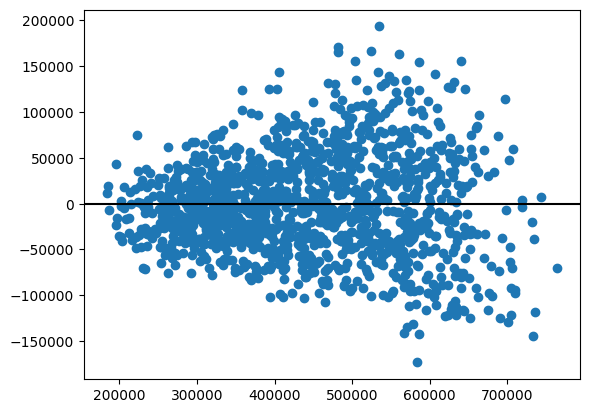

In [3]:
import matplotlib.pyplot as plt 

housing_prices["residuals"] = model.resid
housing_prices["predicted_values"] = model.predict()

plt.scatter(
    housing_prices["predicted_values"],
    housing_prices["residuals"]
)
plt.axhline(y=0, color= "black", linestyle="-");

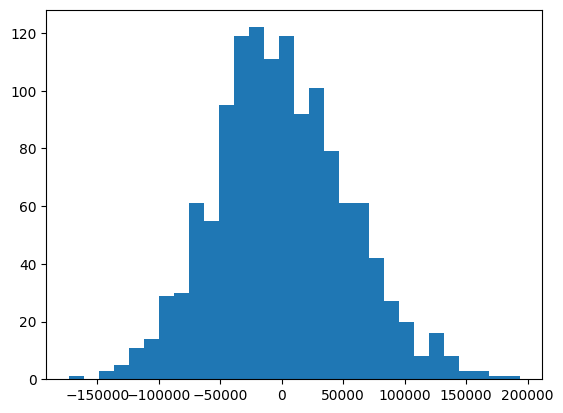

In [4]:
plt.hist(housing_prices["residuals"], bins=30);

9.2

In [5]:
rats = pd.read_csv("../datasets/rat_sightings.csv")
weather = pd.read_csv("../datasets/weather.csv")

rats_weather = pd.merge(
    weather,
    rats,
    on = "day",
    how = "left"
).fillna(0)

rats_weather["day"] = pd.to_datetime(
    rats_weather["day"],
    format='%m/%d/%y'
)

rats_weather.corr().round(2)

,day,high_temp,low_temp,humidity,wind_speed,precip,rat_sightings
day,1.00,0.11,0.13,-0.09,-0.01,-0.06,-0.04
high_temp,0.11,1.00,0.96,0.17,-0.22,-0.04,0.60
low_temp,0.13,0.96,1.00,0.19,-0.25,-0.03,0.61
humidity,-0.09,0.17,0.19,1.00,0.04,0.23,0.15
wind_speed,-0.01,-0.22,-0.25,0.04,1.00,0.21,-0.24
precip,-0.06,-0.04,-0.03,0.23,0.21,1.00,-0.03
rat_sightings,-0.04,0.60,0.61,0.15,-0.24,-0.03,1.00


In [6]:

rats_weather["dow"] = rats_weather["day"].dt.dayofweek
rats_weather["month_num"] = rats_weather["day"].dt.month
rats_weather.head()  

,day,high_temp,low_temp,humidity,wind_speed,precip,rat_sightings,dow,month_num
0,2018-01-01,19.0,8.0,67.0,22.0,0.00,15,0,1
1,2018-01-02,26.0,14.0,59.0,21.0,0.00,36,1,1
2,2018-01-03,30.0,18.0,53.0,16.0,0.00,36,2,1
3,2018-01-04,29.0,20.0,92.0,37.0,0.02,14,3,1
4,2018-01-05,19.0,11.0,56.0,31.0,6.54,18,4,1


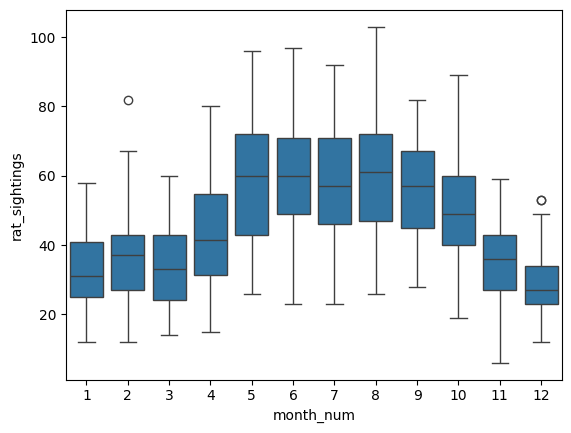

In [7]:
import seaborn as sns
sns.boxplot(data=rats_weather, x="month_num", y="rat_sightings");

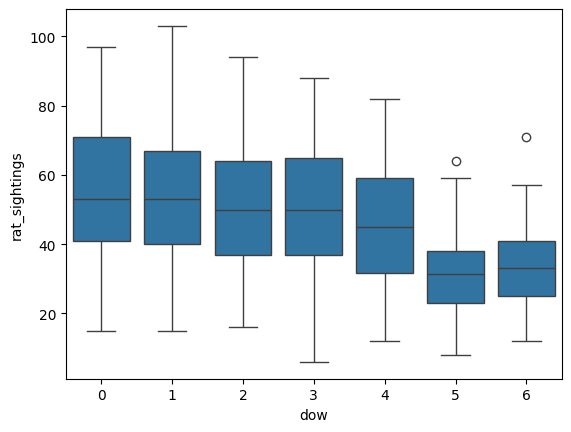

In [8]:
sns.boxplot(data=rats_weather, x="dow", y="rat_sightings"); 

In [9]:
rats_weather["weekday"] = (rats_weather["dow"]<5).astype(int)
rats_weather[
    ["high_temp", "wind_speed", "weekday", "rat_sightings"]
].corr().round(2)

,high_temp,wind_speed,weekday,rat_sightings
high_temp,1.00,-0.22,0.01,0.60
wind_speed,-0.22,1.00,0.02,-0.24
weekday,0.01,0.02,1.00,0.47
rat_sightings,0.60,-0.24,0.47,1.00


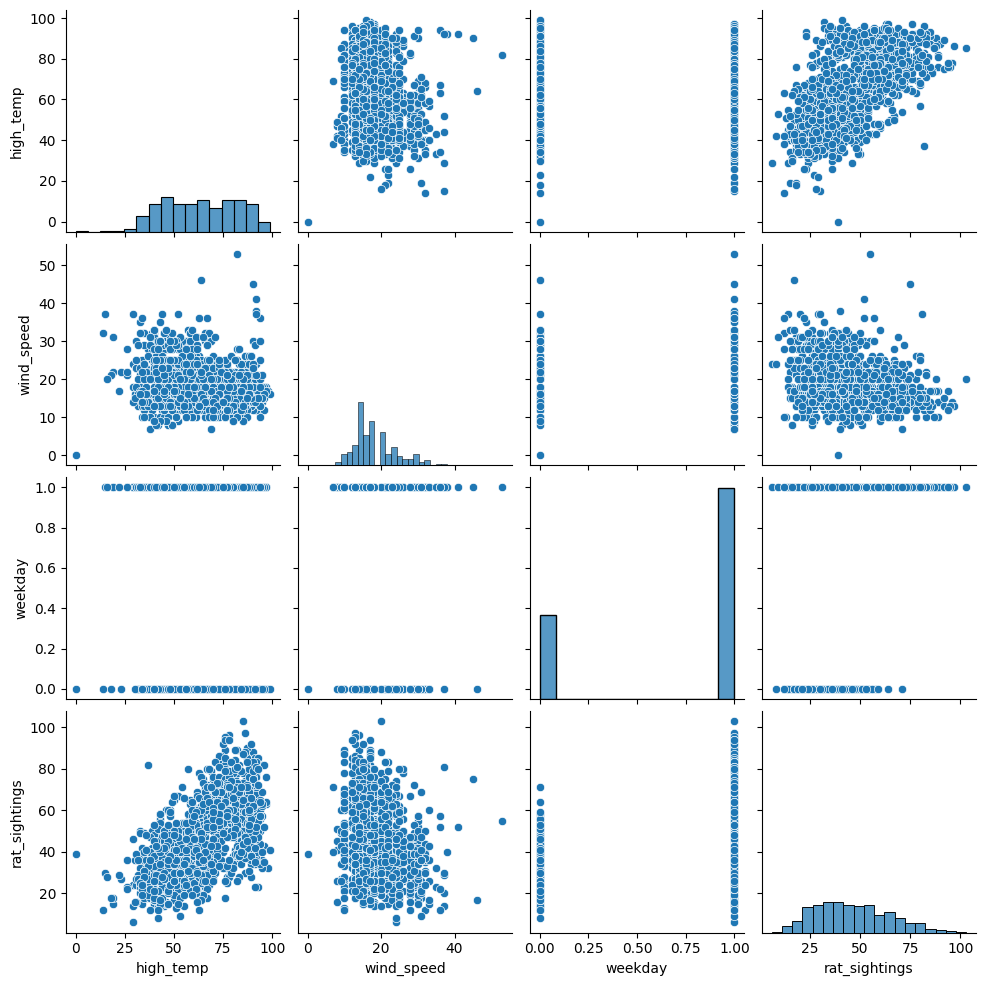

In [10]:
sns.pairplot(
 rats_weather[["high_temp", "wind_speed", "weekday", "rat_sightings"]]
) 

In [11]:
import numpy as np

rats_weather["wind_speed_sq"] = rats_weather["wind_speed"]**2
rats_weather["wind_speed_sqrt"] = np.sqrt(rats_weather["wind_speed"])

rats_weather[
    ["wind_speed_sq", "wind_speed_sqrt", "wind_speed", "rat_sightings"]
].corr().round(2)

,wind_speed_sq,wind_speed_sqrt,wind_speed,rat_sightings
wind_speed_sq,1.00,0.94,0.98,-0.23
wind_speed_sqrt,0.94,1.00,0.99,-0.23
wind_speed,0.98,0.99,1.00,-0.24
rat_sightings,-0.23,-0.23,-0.24,1.00


9.2.2

In [12]:
X = rats_weather[["high_temp", "wind_speed", "weekday"]]
y = rats_weather["rat_sightings"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          rat_sightings   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     519.6
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.02e-209
Time:                        13:48:38   Log-Likelihood:                -4245.3
No. Observations:                1096   AIC:                             8499.
Df Residuals:                    1092   BIC:                             8519.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0289      1.949      2.067      0.0

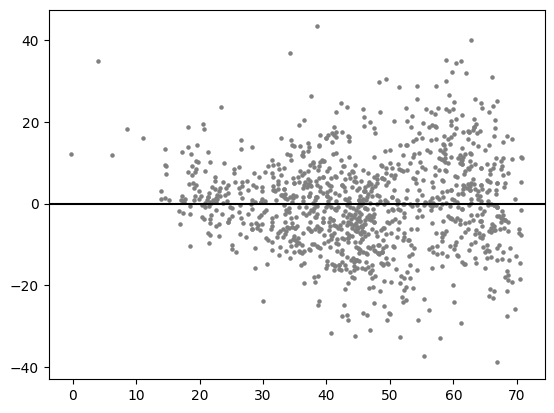

In [13]:
rats_weather["residuals"] = model.resid
rats_weather["predicted_values"] = model.predict()

plt.scatter(
    rats_weather["predicted_values"],
    rats_weather["residuals"], color="gray", s=5
)    #B
plt.axhline(y=0, color="black", linestyle="-");

In [14]:
rats_weather[rats_weather["predicted_values"]<10]

,day,high_temp,low_temp,humidity,wind_speed,precip,rat_sightings,dow,month_num,weekday,wind_speed_sq,wind_speed_sqrt,residuals,predicted_values
5,2018-01-06,14.0,8.0,55.0,32.0,0.0,12,5,1,0,1024.0,5.656854,12.184757,-0.184757
6,2018-01-07,18.0,6.0,64.0,21.0,0.0,18,6,1,0,441.0,4.582576,11.803027,6.196973
13,2018-01-14,23.0,16.0,59.0,22.0,0.0,27,6,1,0,484.0,4.690416,18.380587,8.619413
1042,2020-11-08,0.0,0.0,0.0,0.0,0.0,39,6,11,0,0.0,0.000000,34.971120,4.028880


In [15]:
rats_weather = rats_weather[rats_weather["high_temp"]!=0]

In [16]:
X = rats_weather[["high_temp", "wind_speed", "weekday"]]
y = np.sqrt(rats_weather["rat_sightings"])
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          rat_sightings   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     554.8
Date:                Mon, 26 May 2025   Prob (F-statistic):          6.74e-219
Time:                        13:51:45   Log-Likelihood:                -1382.8
No. Observations:                1095   AIC:                             2774.
Df Residuals:                    1091   BIC:                             2794.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4028      0.145     23.424      0.0

In [17]:
rats_weather["high_precip"] = (
rats_weather["precip"] > 0.1
).astype(int)

rats_weather[
    ["high_temp", "wind_speed", "weekday", "high_precip", "rat_sightings"]
].corr().round(2)  

,high_temp,wind_speed,weekday,high_precip,rat_sightings
high_temp,1.00,-0.23,0.00,-0.03,0.60
wind_speed,-0.23,1.00,0.01,0.27,-0.24
weekday,0.00,0.01,1.00,0.01,0.47
high_precip,-0.03,0.27,0.01,1.00,-0.04
rat_sightings,0.60,-0.24,0.47,-0.04,1.00


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = rats_weather[["high_temp", "wind_speed", "weekday"]]
y = np.sqrt(rats_weather["rat_sightings"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99
)    #C

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

r2_train = model.score(X_train, y_train) 
r2_test = model.score(X_test, y_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Training Set RMSE: {rmse_train}")
print(f"Test Set RMSE: {rmse_test}")
print(f"Training Set R-squared: {r2_train}")
print(f"Test Set R-squared: {r2_test}")


Training Set RMSE: 0.8444633721626252
Test Set RMSE: 0.8995248582881075
Training Set R-squared: 0.6113502001901925
Test Set R-squared: 0.573907926397266
